In [4]:
#imports
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import shapefile as shp  # Requires the pyshp package
import utm
import math
%matplotlib inline

# Pipline Data

In [5]:
sf = shp.Reader(r"C:\Users\Aaron Schwan\Desktop\ppl_arcs.shp")
print(sf)

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

ShapefileException: Unable to open C:\Users\Aaron Schwan\Desktop\ppl_arcs.dbf or C:\Users\Aaron Schwan\Desktop\ppl_arcs.shp.

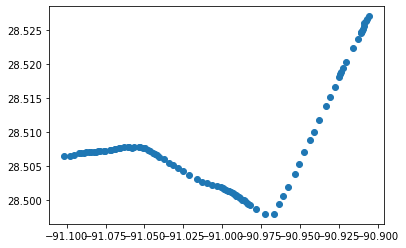

In [4]:
#Standard line
plt.figure()
shape = sf.shapeRecords()[0]

lat = np.array([i[0] for i in shape.shape.points[:]])
lon = np.array([i[1] for i in shape.shape.points[:]])

plt.scatter(lat,lon)
plt.show()

In [7]:
shape = sf.shapeRecords()[0]

#minimum distances
min_dist_lat = 0.01
min_dist_lon = 0.01

#original lat and lons
lat = np.array([i[0] for i in shape.shape.points[:]])
lon = np.array([i[1] for i in shape.shape.points[:]])

#vector components 
off_set_lat = lat[0:-2]-lat[1:-1]
off_set_lon = lon[0:-2]-lon[1:-1]

#perpendicular unit vectors 
perp_1_lat = off_set_lat
perp_1_lon = -1*off_set_lon


mag1 = np.sqrt(perp_1_lat**2+perp_1_lon**2)

perp_1_lat = perp_1_lat/mag1
perp_1_lon = perp_1_lon/mag1

#Offseting By Perscribed distance
set_1_lat = perp_1_lat*min_dist_lat+lat[1:-1]
set_1_lon = perp_1_lon*min_dist_lon+lon[1:-1]
set_2_lat = -1*perp_1_lat*min_dist_lat+lat[1:-1]
set_2_lon = -1*perp_1_lon*min_dist_lon+lon[1:-1]


plt.figure()

#boxed line
plt.plot(set_1_lat,set_1_lon)
plt.plot(set_2_lat,set_2_lon)

#standard line
#plt.scatter(lat[1:-1],lon[1:-1])
plt.show()

NameError: name 'sf' is not defined

shapefile Reader
    90 shapes (type 'POLYGON')
    90 records (12 fields)
[-94.53443525 -94.48495973 -94.48686991 -94.53632454 -94.53443525] [28.91280768 28.91113533 28.86760045 28.86927208 28.91280768]
-94.51540493812499
28.89472464375003


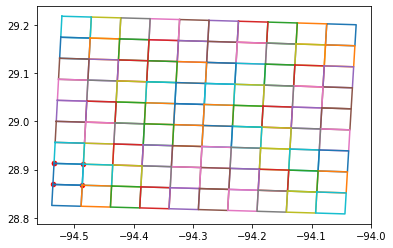

In [36]:
sf = shp.Reader(r"C:\Users\Aaron Schwan\Desktop\lease_block\Galveston Lease Blocks\cwc_block_sel.shp")
print(sf)


plt.figure()
for i,shape in enumerate(sf.shapeRecords()):
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,label = i)

shape = sf.shapeRecords()[40]

lat = np.array([i[0] for i in shape.shape.points[:]])
lon = np.array([i[1] for i in shape.shape.points[:]])
print(lat,lon)
print(sum(lat)/len(lat))
print(sum(lon)/len(lon))

plt.scatter(lat,lon,c='red',s=20)
plt.show()



In [37]:
sub_station_lat = 29.4875
sub_station_lon = -94.9824

distances_list = []

for shape in sf.shapeRecords():

    lat = np.array([i[0] for i in shape.shape.points[:]])
    lon = np.array([i[1] for i in shape.shape.points[:]])

    #plt.scatter(sub_station_lon,sub_station_lat)
    #plt.scatter(lat,lon,c='red',s=20)
    #plt.show()

    R = 6373.0


    lat1 = math.radians(sum(lat)/len(lat))
    lon1 = math.radians(sum(lon)/len(lon))
    lat2 = math.radians(sub_station_lon)
    lon2 = math.radians(sub_station_lat)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distances_list.append(R * c)

print(min(distances_list))
print(max(distances_list))
print(sum(distances_list)/len(distances_list))

shape = sf.shapeRecords()[40]
lat = np.array([i[0] for i in shape.shape.points[:]])
lon = np.array([i[1] for i in shape.shape.points[:]])

#plt.scatter(sub_station_lon,sub_station_lat)
#plt.scatter(lat,lon,c='red',s=20)
#plt.show()

R = 6373.0


lat1 = math.radians(sum(lat)/len(lat))
lon1 = math.radians(sum(lon)/len(lon))
lat2 = math.radians(sub_station_lon)
lon2 = math.radians(sub_station_lat)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))


print(R*c)

52.06290407841366
103.11931940776577
77.49471221409387
52.22912237578468


In [41]:
with open(r"C:\Users\Aaron Schwan\Desktop\MAI3CPASM.L2.AsmMAI3CPASMStrip200kmAlongCloudSat.2006.06.02.000000Z.v5.2.0.hdf",'r') as file:
    data = file.read()
    file.close()
    
print(data)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 53: character maps to <undefined>

In [44]:
import pandas as pd
import sys

fpath = r"C:\Users\Aaron Schwan\Desktop\test_data.hdf"

df = pd.read_hdf(fpath, key=key)


df.to_csv(sys.stdout, index=False)

OSError: HDF5 error back trace

  File "C:\ci\hdf5_1545244154871\work\src\H5F.c", line 509, in H5Fopen
    unable to open file
  File "C:\ci\hdf5_1545244154871\work\src\H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "C:\ci\hdf5_1545244154871\work\src\H5Fint.c", line 1700, in H5F_open
    unable to read superblock
  File "C:\ci\hdf5_1545244154871\work\src\H5Fsuper.c", line 411, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file 'C:\Users\Aaron Schwan\Desktop\test_data.hdf'